### Merge Multiple Datasets for classification
Datumaro supports merging multiple datasets into single dataset.

In this document, we import 'mnist' and 'mnist_csv' datasets.
Note that their data format is the same as mnist but the data of former is stored as pickle and the latter as csv.
Then, we export the merged dataset to single dataset.

In [1]:
!datum download get -i tfds:eurosat -o eurosat -- --save-media
!datum download get -i tfds:uc_merced -o uc_merced -- --save-media

2023-04-11 18:18:13,732 ERROR: Directory 'eurosat' already exists (pass --overwrite to overwrite)
2023-04-11 18:18:18,360 ERROR: Directory 'uc_merced' already exists (pass --overwrite to overwrite)


Dataset
	size=27000
	source_path=eurosat
	media_type=<class 'datumaro.components.media.Image'>
	annotated_items_count=27000
	annotations_count=27000
subsets
	train: # of items=27000, # of annotated items=27000, # of annotations=27000, annotation types=['label']
infos
	categories
	label: ['AnnualCrop', 'Forest', 'HerbaceousVegetation', 'Highway', 'Industrial', 'Pasture', 'PermanentCrop', 'Residential', 'River', 'SeaLake']



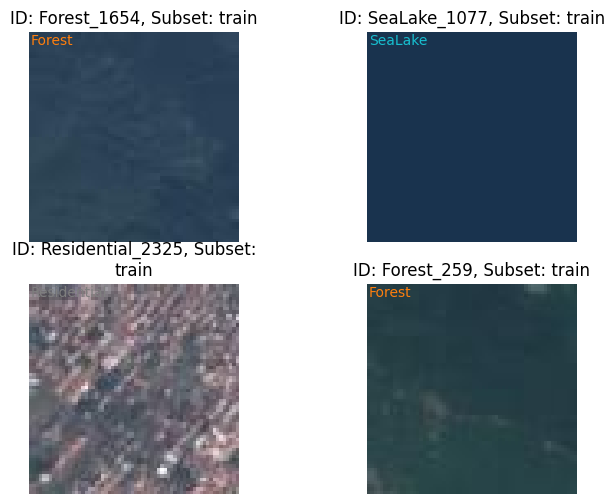

In [1]:
# Copyright (C) 2023 Intel Corporation
#
# SPDX-License-Identifier: MIT

import datumaro as dm

eurosat = dm.Dataset.import_from("eurosat")
print(eurosat)

viz = dm.Visualizer(eurosat, figsize=(8, 6))
items = viz.get_random_items(4)
fig = viz.vis_gallery(items=items)
fig.show()

Dataset
	size=2100
	source_path=uc_merced
	media_type=<class 'datumaro.components.media.Image'>
	annotated_items_count=2100
	annotations_count=2100
subsets
	train: # of items=2100, # of annotated items=2100, # of annotations=2100, annotation types=['label']
infos
	categories
	label: ['agricultural', 'airplane', 'baseballdiamond', 'beach', 'buildings', 'chaparral', 'denseresidential', 'forest', 'freeway', 'golfcourse', 'harbor', 'intersection', 'mediumresidential', 'mobilehomepark', 'overpass', 'parkinglot', 'river', 'runway', 'sparseresidential', 'storagetanks', 'tenniscourt']



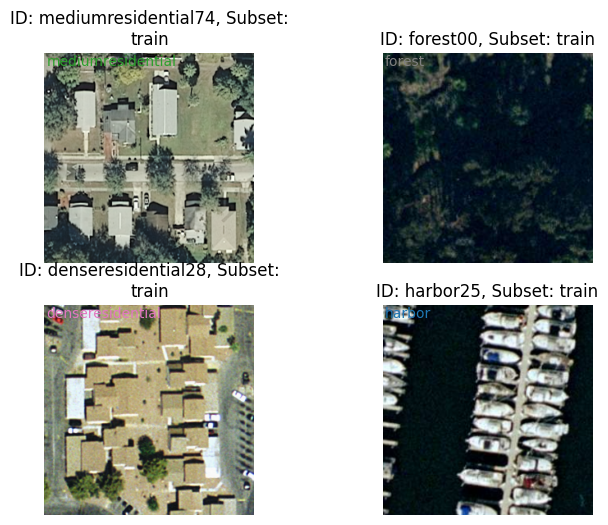

In [2]:
uc_merced = dm.Dataset.import_from("uc_merced")
print(uc_merced)

viz = dm.Visualizer(uc_merced, figsize=(8, 6))
items = viz.get_random_items(4)
fig = viz.vis_gallery(items=items)
fig.show()

In [3]:
eurosat_label_names = [
    label_cat.name for label_cat in eurosat.categories()[dm.AnnotationType.label]
]
uc_merced_label_names = [
    label_cat.name for label_cat in uc_merced.categories()[dm.AnnotationType.label]
]

print("EuroSAT label names:")
print(eurosat_label_names)

print("UCMerced label names:")
print(uc_merced_label_names)

EuroSAT label names:
['AnnualCrop', 'Forest', 'HerbaceousVegetation', 'Highway', 'Industrial', 'Pasture', 'PermanentCrop', 'Residential', 'River', 'SeaLake']
UCMerced label names:
['agricultural', 'airplane', 'baseballdiamond', 'beach', 'buildings', 'chaparral', 'denseresidential', 'forest', 'freeway', 'golfcourse', 'harbor', 'intersection', 'mediumresidential', 'mobilehomepark', 'overpass', 'parkinglot', 'river', 'runway', 'sparseresidential', 'storagetanks', 'tenniscourt']


### Remap label names

The two datasets have different label names textually, but some of them are semantically identical. We use the following table to remap the labels. After this label remapping operation is complete, the two datasets can be merged into the one.

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-9wq8{border-color:inherit;text-align:center;vertical-align:middle}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-9wq8">EuroSAT</th>
    <th class="tg-9wq8">UCMerced</th>
    <th class="tg-9wq8">Destination</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-9wq8">AnnualCrop</td>
    <td class="tg-9wq8" rowspan="3">agricultural</td>
    <td class="tg-9wq8" rowspan="3">agricultural</td>
  </tr>
  <tr>
    <td class="tg-9wq8">Pasture</td>
  </tr>
  <tr>
    <td class="tg-9wq8">PermanentCrop</td>
  </tr>
  <tr>
    <td class="tg-9wq8" rowspan="3">Industrial</td>
    <td class="tg-9wq8">buildings</td>
    <td class="tg-9wq8" rowspan="3">industrial</td>
  </tr>
  <tr>
    <td class="tg-9wq8">parkinglot</td>
  </tr>
  <tr>
    <td class="tg-9wq8">storagetanks</td>
  </tr>
  <tr>
    <td class="tg-9wq8">Forest</td>
    <td class="tg-9wq8">forest</td>
    <td class="tg-9wq8">forest</td>
  </tr>
  <tr>
    <td class="tg-9wq8" rowspan="3">Highway</td>
    <td class="tg-9wq8">freeway</td>
    <td class="tg-9wq8" rowspan="3">highway</td>
  </tr>
  <tr>
    <td class="tg-9wq8">intersection</td>
  </tr>
  <tr>
    <td class="tg-9wq8">overpass</td>
  </tr>
  <tr>
    <td class="tg-9wq8">HerbaceousVegetation</td>
    <td class="tg-9wq8">chaparral</td>
    <td class="tg-9wq8">chaparral</td>
  </tr>
  <tr>
    <td class="tg-9wq8" rowspan="7">Residential</td>
    <td class="tg-9wq8">denseresidential</td>
    <td class="tg-9wq8" rowspan="7">residential</td>
  </tr>
  <tr>
    <td class="tg-9wq8">mediumresidential</td>
  </tr>
  <tr>
    <td class="tg-9wq8">baseballdiamond</td>
  </tr>
  <tr>
    <td class="tg-9wq8">sparseresidential</td>
  </tr>
  <tr>
    <td class="tg-9wq8">golfcourse</td>
  </tr>
  <tr>
    <td class="tg-9wq8">tenniscourt</td>
  </tr>
  <tr>
    <td class="tg-9wq8">mobilehomepark</td>
  </tr>
  <tr>
    <td class="tg-9wq8">River</td>
    <td class="tg-9wq8">river</td>
    <td class="tg-9wq8">river</td>
  </tr>
  <tr>
    <td class="tg-9wq8" rowspan="2">SeaLake</td>
    <td class="tg-9wq8">harbor</td>
    <td class="tg-9wq8" rowspan="2">sea</td>
  </tr>
  <tr>
    <td class="tg-9wq8">beach</td>
  </tr>
  <tr>
    <td class="tg-9wq8" rowspan="2"></td>
    <td class="tg-9wq8">airplane</td>
    <td class="tg-9wq8" rowspan="2">airport</td>
  </tr>
  <tr>
    <td class="tg-9wq8">runway</td>
  </tr>
</tbody>
</table>

In [4]:
eurosat.transform(
    "remap_labels",
    mapping={
        "AnnualCrop": "agricultural",
        "Pasture": "agricultural",
        "PermanentCrop": "agricultural",
        "Industrial": "industrial",
        "Forest": "forest",
        "Highway": "highway",
        "HerbaceousVegetation": "chaparral",
        "Residential": "residential",
        "River": "river",
        "SeaLake": "sea",
    },
)

Dataset
	size=27000
	source_path=eurosat
	media_type=<class 'datumaro.components.media.Image'>
	annotated_items_count=27000
	annotations_count=27000
subsets
	train: # of items=27000, # of annotated items=27000, # of annotations=27000, annotation types=['label']
infos
	categories
	label: ['agricultural', 'forest', 'chaparral', 'highway', 'industrial', 'residential', 'river', 'sea']

In [5]:
uc_merced.transform(
    "remap_labels",
    mapping={
        "buildings": "industrial",
        "parkinglot": "industrial",
        "storagetanks": "industrial",
        "freeway": "highway",
        "intersection": "highway",
        "overpass": "highway",
        "denseresidential": "residential",
        "mediumresidential": "residential",
        "baseballdiamond": "residential",
        "sparseresidential": "residential",
        "golfcourse": "residential",
        "tenniscourt": "residential",
        "mobilehomepark": "residential",
        "harbor": "sea",
        "beach": "sea",
        "airplane": "airport",
        "runway": "airport",
    },
)

Dataset
	size=2100
	source_path=uc_merced
	media_type=<class 'datumaro.components.media.Image'>
	annotated_items_count=2100
	annotations_count=2100
subsets
	train: # of items=2100, # of annotated items=2100, # of annotations=2100, annotation types=['label']
infos
	categories
	label: ['agricultural', 'airport', 'residential', 'sea', 'industrial', 'chaparral', 'forest', 'highway', 'river']

In [6]:
merged = dm.HLOps.merge(uc_merced, eurosat)
merged

Dataset
	size=29100
	source_path=None
	media_type=<class 'datumaro.components.media.Image'>
	annotated_items_count=29100
	annotations_count=29100
subsets
	train: # of items=29100, # of annotated items=29100, # of annotations=29100, annotation types=['label']
infos
	categories
	label: ['agricultural', 'airport', 'residential', 'sea', 'industrial', 'chaparral', 'forest', 'highway', 'river']